<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])
print('done')

done


### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset3.csv")
print('done')

done


---


# Test Environment


In [4]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd
import io

def read_csv_file(URL):
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv('dataset3.csv')
        return df
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"The file {file_path} is empty.")
        return None
    except pd.errors.ParserError as e:
        print(f"Error parsing the file {file_path}: {e}")
        return None

# Specify the file path
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

# Read the CSV file
df = read_csv_file("dataset3.csv")

# Check if the file was read successfully
if df is not None:
    print(df.head())  # Print the first few rows of the DataFrame

<ipython-input-4-135e7a654d91>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [5]:
# Replace strings with numbers in transmission column
df['transmission'] = df['transmission'].map({'Automatic': 1, 'Manual': 2, 'Semi-Auto': 3})

#Replace strings with numbers in fuelType column
df['fuelType'] = df['fuelType'].map({'Petrol':1, 'Diesel': 2, 'Hybrid': 3, 'Electric': 4, 'Other': 5})

df.head(100)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,1,15944,1,150.0,57.7,1.0,12000
1,Focus,2018,2,9083,1,150.0,57.7,1.0,14000
2,Focus,2017,2,12456,1,150.0,57.7,1.0,13000
3,Fiesta,2019,2,10460,1,145.0,40.3,1.5,17500
4,Fiesta,2019,1,1482,1,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
95,Fiesta,2016,2,24410,1,125.0,54.3,1.2,8495
96,Fiesta,2019,2,13600,1,145.0,58.9,1.0,13895
97,Focus,2018,2,21456,2,145.0,67.3,2.0,18298
98,Focus,2015,2,31512,2,0.0,74.3,1.5,9198


In [12]:
# Get unique values in model column
unique_model_values = df['model'].unique()

# Print unique values
print(unique_model_values)

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' 'Focus']


In [6]:
# Drop model column
df = df.drop('model', axis=1)

# Print the updated dataframe
print(df)

       year  transmission  mileage  fuelType    tax   mpg  engineSize  price
0      2017             1    15944         1  150.0  57.7         1.0  12000
1      2018             2     9083         1  150.0  57.7         1.0  14000
2      2017             2    12456         1  150.0  57.7         1.0  13000
3      2019             2    10460         1  145.0  40.3         1.5  17500
4      2019             1     1482         1  145.0  48.7         1.0  16500
...     ...           ...      ...       ...    ...   ...         ...    ...
17961  2017             2    16700         1  150.0  47.1         1.4   8999
17962  2014             2    40700         1   30.0  57.7         1.0   7499
17963  2015             2     7010         2   20.0  67.3         1.6   9999
17964  2018             2     5007         1  145.0  57.7         1.2   8299
17965  2015             2     5007         1   22.0  57.7         1.0   8299

[17966 rows x 8 columns]


In [7]:
print('The shape of df is:',df.shape)
print('\nStatistical breakdown of df:', '\n', df.describe())


The shape of df is: (17966, 8)

Statistical breakdown of df: 
                year  transmission        mileage      fuelType           tax  \
count  17966.000000  17966.000000   17966.000000  17966.000000  17963.000000   
mean    2016.866470      1.984749   23362.608761      1.323723    113.329177   
std        2.050336      0.368826   19472.054349      0.471936     62.017631   
min     1996.000000      1.000000       1.000000      1.000000      0.000000   
25%     2016.000000      2.000000    9987.000000      1.000000     30.000000   
50%     2017.000000      2.000000   18242.500000      1.000000    145.000000   
75%     2018.000000      2.000000   31060.000000      2.000000    145.000000   
max     2060.000000      3.000000  177644.000000      5.000000    580.000000   

                mpg    engineSize         price  
count  17966.000000  17966.000000  17966.000000  
mean      57.906980      1.350807  12279.534844  
std       10.125696      0.432367   4741.343657  
min       20.800

In [8]:
# Identify the columns with missing values
missing_columns = df.isnull().sum()
print("Columns with missing values:")
print(missing_columns)

# Replace missing values with mean of the column
for column in missing_columns.index:
    df[column] = df[column].fillna(df[column].mean())

# Delete duplicate entries
df = df.drop_duplicates()

# Print the updated dataframe
print(df.head())

Columns with missing values:
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64
   year  transmission  mileage  fuelType    tax   mpg  engineSize  price
0  2017             1    15944         1  150.0  57.7         1.0  12000
1  2018             2     9083         1  150.0  57.7         1.0  14000
2  2017             2    12456         1  150.0  57.7         1.0  13000
3  2019             2    10460         1  145.0  40.3         1.5  17500
4  2019             1     1482         1  145.0  48.7         1.0  16500


In [9]:
df.loc[df['tax'].isnull(), 'tax'] = df['tax'].mean()

In [10]:
df.head(20)

,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,2017,1,15944,1,150.0,57.7,1.0,12000
1,2018,2,9083,1,150.0,57.7,1.0,14000
2,2017,2,12456,1,150.0,57.7,1.0,13000
3,2019,2,10460,1,145.0,40.3,1.5,17500
4,2019,1,1482,1,145.0,48.7,1.0,16500
5,2015,2,35432,1,145.0,47.9,1.6,10500
6,2019,2,2029,1,145.0,50.4,1.0,22500
7,2017,2,13054,1,145.0,54.3,1.2,9000
8,2019,1,6894,2,145.0,42.2,2.0,25500
9,2018,2,48141,1,145.0,61.4,1.0,10000


In [11]:
# Identify the columns with missing values
missing_columns = df.isnull().sum()
print("Columns with missing values:")
print(missing_columns)

# Replace missing values with mean of the column
for column in missing_columns.index:
    df[column] = df[column].fillna(df[column].mean())

# Delete duplicate entries
df = df.drop_duplicates()

# Print the updated dataframe
print(df.head())

Columns with missing values:
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64
   year  transmission  mileage  fuelType    tax   mpg  engineSize  price
0  2017             1    15944         1  150.0  57.7         1.0  12000
1  2018             2     9083         1  150.0  57.7         1.0  14000
2  2017             2    12456         1  150.0  57.7         1.0  13000
3  2019             2    10460         1  145.0  40.3         1.5  17500
4  2019             1     1482         1  145.0  48.7         1.0  16500


In [27]:
#Code to this point has converted strings to integer values, the model column has been dropped, and missing values in "tax" have been replaced with the mean

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17811 entries, 0 to 17965
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          17811 non-null  int64  
 1   transmission  17811 non-null  int64  
 2   mileage       17811 non-null  int64  
 3   fuelType      17811 non-null  int64  
 4   tax           17811 non-null  float64
 5   mpg           17811 non-null  float64
 6   engineSize    17811 non-null  float64
 7   price         17811 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.2 MB


In [13]:
#Question 1: Identify the 5 attributes that have the highest correlation with the price parameter.

# Calculate correlation matrix
corr_matrix = df.corr()

# Get the top 5 columns with the highest correlation with 'Price'
top_cols = corr_matrix.unstack().sort_values(ascending=False).head(5).index

# Print the top 5 columns with the highest correlation with 'Price'
print("Top 5 columns with the highest correlation with 'Price':")
print(top_cols)

Top 5 columns with the highest correlation with 'Price':
MultiIndex([(        'year',         'year'),
            ('transmission', 'transmission'),
            (  'engineSize',   'engineSize'),
            (         'mpg',          'mpg'),
            (         'tax',          'tax')],
           )


In [41]:
#Question 2: Count the number of each fuel type in df
#Fuel types: Petrol(1), Diesel(2), Hybrid(3), Electric(4), Other(5)

# Get unique values in fuelType column
unique_fuel_types = df['fuelType'].unique()

# Count the number of entries for each unique fuelType
fuel_type_counts = df['fuelType'].value_counts()

# Print the results
print(fuel_type_counts)


fuelType
1    12080
2     5706
3       22
4        2
5        1
Name: count, dtype: int64


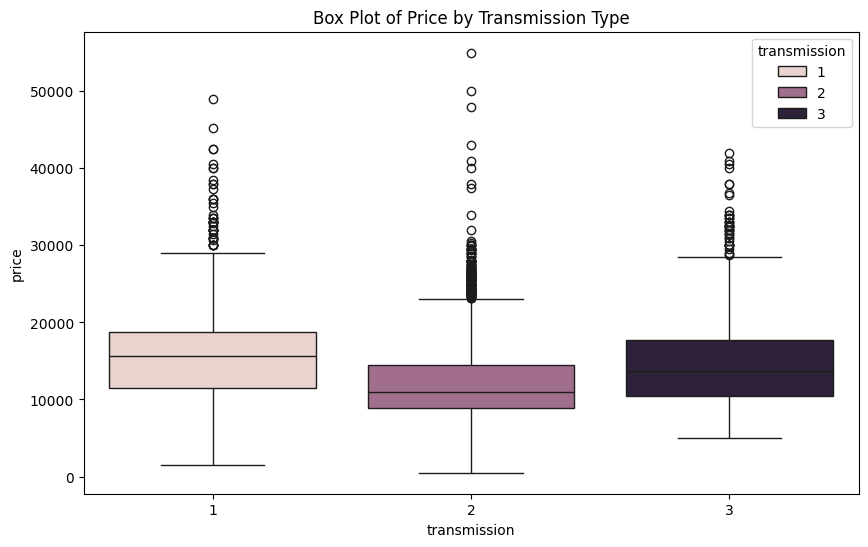

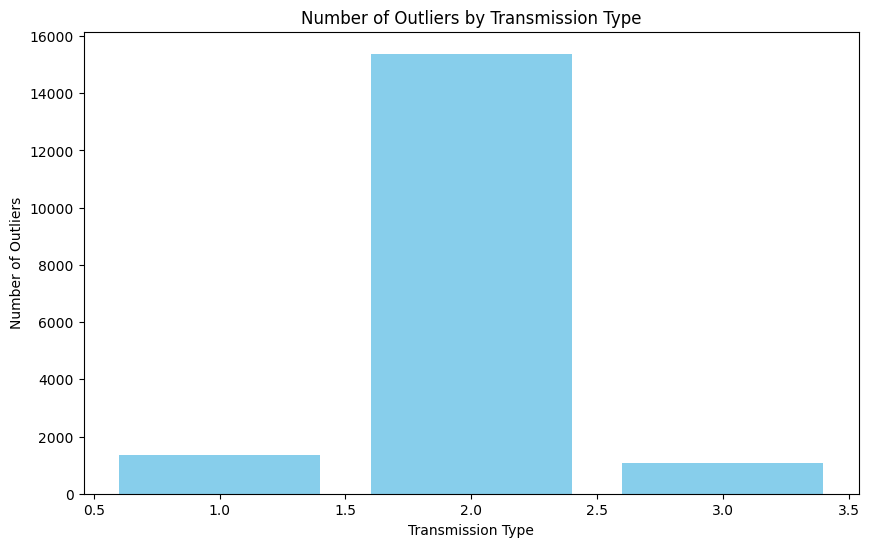

In [14]:
#Question 3: Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.
#import matplotlib and seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get unique values in transmission column
unique_transmission = df['transmission'].unique()

# Create a box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission', y='price', data=df, hue = 'transmission')
plt.title('Box Plot of Price by Transmission Type')
plt.show()

# Count the number of outliers for each transmission type
transmission_outliers = df.groupby('transmission')['price'].count()

# Create a bar plot to compare the number of outliers
plt.figure(figsize=(10,6))
plt.bar(transmission_outliers.index, transmission_outliers.values, color='skyblue')
plt.title('Number of Outliers by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Outliers')
plt.show()



R-squared: 0.11992455314603845
Mean Squared Error: 19741949.30837525


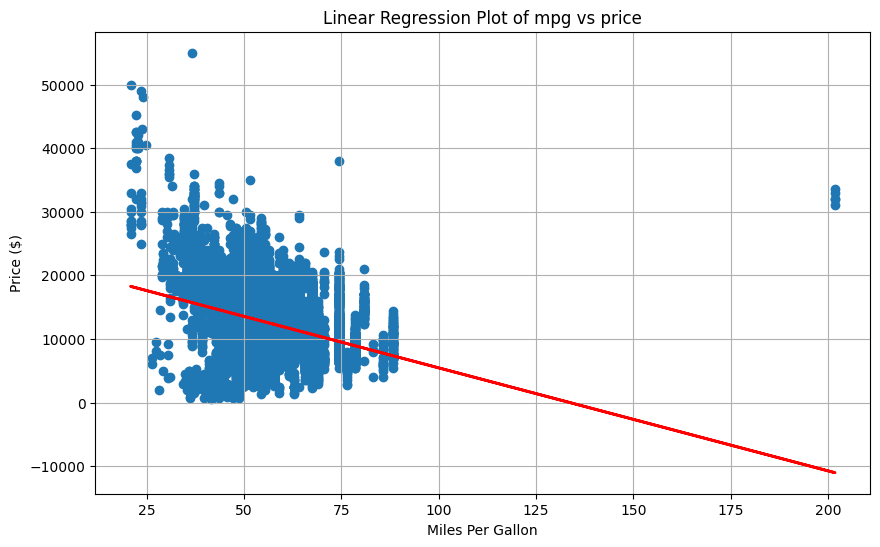

In [15]:
#Question 4: Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Define variables
X = df[['mpg']]
y = df['price']

model = LinearRegression()
model.fit(X, y) 

r_squared = model.score(X, y) 
print("R-squared:", r_squared) 

y_pred = model.predict(X) 
mse = ((y - y_pred)**2).mean()
print("Mean Squared Error:", mse) 

# Plot the data and the regression line
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot(X, y_pred, color='r', linewidth=2)
plt.xlabel('Miles Per Gallon')
plt.ylabel('Price ($)')
plt.title('Linear Regression Plot of mpg vs price')
plt.grid(True)
plt.show()


## Model Development

In [ ]:
#Question 1: Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model. (See above)

In [16]:
#Question 2: Fit a linear regression model to predict the price using the following set of features: year, mileage, tax, mpg and engineSize.
#Calculate the R^2 and MSE values for this model.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define the independent variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]

# Define the dependent variable
y = df['price']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y) 

# Print the coefficients
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

# Predict the values
y_pred = model.predict(X)

# Calculate the R^2 value
r_squared = model.score(X, y) 
print("R-squared:", r_squared) 

# Calculate the Mean Squared Error (MSE)
mse = ((y - y_pred)**2).mean()
print("Mean Squared Error:", mse) 

Coefficients:  [ 1.21577737e+03 -5.82470156e-02  7.84808923e-01 -8.11620355e+01
  5.34067321e+03]
Intercept:  -2441026.433701834
R-squared: 0.7265357593202044
Mean Squared Error: 6134379.95168806


In [20]:
#Question 3: For the same set of features as in the question above, create a pipeline model object that uses standard scalar, 
#second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures(degree=2)), 
    ('linear_reg', LinearRegression())
]) 

# Define the features and the target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Fit the pipeline to the training data
pipeline.fit(X, y)

# Make predictions on the testing data
y_pred = pipeline.predict(X)

# Evaluate the R^2 value
r2 = r2_score(y, y_pred)

# Evaluate the MSE value
mse = mean_squared_error(y, y_pred)

print(f"R^2 value: {r2}")
print(f"MSE value: {mse}")

R^2 value: 0.7666607059816599
MSE value: 5234292.73095781


In [21]:
#Question 4: For the same set of features, split the data into training and testing data parts. 
#Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, 
#set the regularization parameter to 0.1, and calculate the R^2 using the test data.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test)

# Evaluate the MSE value
mse = mean_squared_error(y_test, y_pred)

# Evaluate the R^2 value
r2 = r2_score(y_test, y_pred)

print(f"MSE value: {mse}")
print(f"R^2 value: {r2}")

MSE value: 6006632.648978922
R^2 value: 0.7347607084591217


In [22]:
#Question 5: Perform a second order polynomial transform on both the training data and testing data created for the question above. 
#Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, 
#and calculate the R^2 and MSE utilising the modified test data.

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)

# Fit the model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the MSE value
mse = mean_squared_error(y_test, y_pred)

# Evaluate the R^2 value
r2 = r2_score(y_test, y_pred)

print(f"MSE value: {mse}")
print(f"R^2 value: {r2}")

MSE value: 6006655.080289053
R^2 value: 0.7347597179432777


In [23]:
#Question 6: In the question above, perform a Grid Search on ridge regression for a set of 
#values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter space for GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Create a Ridge regression model
ridge_model = Ridge()

# Perform GridSearchCV with 4-fold cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Make predictions on the scaled testing data
y_pred = grid_search.predict(X_test_scaled)

# Evaluate the MSE value
mse = mean_squared_error(y_test, y_pred)

# Evaluate the R^2 value
r2 = r2_score(y_test, y_pred)

print(f"Best alpha value: {best_params['alpha']}")
print(f"Best score: {best_score}")
print(f"MSE value: {mse}")
print(f"R^2 value: {r2}")

Best alpha value: 100
Best score: -6224773.961891982
MSE value: 6009342.661625053
R^2 value: 0.7346410404393953


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
